# **Sentiment Analysis of Tweet**

## Introduction

In this project, my aim was to perform sentiment analysis on a dataset comprising tweets. The goal was to classify each tweet into one of three categories: positive, negative, or neutral. This task is crucial in understanding public opinion on various topics, especially in today's digital age where social media platforms are abundant.

## Data Description & Loading

The dataset consisted of tweets that were manually labeled as positive, negative, or neutral. In total, there were X tweets, each not exceeding 280 characters, the standard length for a tweet.

Three datasets were used: training, development, and test datasets. The training and development datasets were successfully loaded, while the test dataset required special handling due to encoding issues.

In [ ]:
pip install pandas matplotlib seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Training Dataset (Tweets_train.csv):*
Loaded using Pandas, the training dataset forms the basis for training our machine learning models. It comprises columns for tweet ID, the tweet text, and the sentiment label. These elements are essential for our sentiment analysis task, with the text serving as the input feature and the sentiment label as the target variable.

*Development Dataset (Tweets_dev.csv):*
The development dataset, loaded in a similar manner, is crucial for validating and tuning our models. Its structure mirrors that of the training dataset, providing a consistent basis for model development and adjustment. This dataset plays a key role in fine-tuning the model parameters and preventing overfitting.

*Test Dataset (Tweets_test.csv):*
The test dataset presented a unique challenge. Initially attempted to be loaded with 'ISO-8859-1' encoding, it required a contingency plan for potential encoding issues, a common hurdle in text data processing. The need for a fallback mechanism in case of a UnicodeDecodeError underscores the complexities of handling diverse and real-world text data, especially when dealing with various languages or special characters.

In [5]:
# Load the datasets
train_data = pd.read_csv('Tweets_train.csv')
dev_data = pd.read_csv('Tweets_dev.csv')

# Loading the test dataset with a different encoding
try:
    test_data = pd.read_csv('Tweets_test.csv', encoding='ISO-8859-1')
except UnicodeDecodeError as e:
    print("Error reading the file with ISO-8859-1 encoding:", e)
    

# Display the first few rows of the training dataset
print(train_data.head())

             tweet_id                                               text  \
0  569179849518161920                    @united you're good. Thank you!   
1  569835751275433984  @AmericanAir way to ruin a vacation, my brothe...   
2  568588936852799488  @JetBlue yes thankfully! Catering just got her...   
3  569525116725567491  @USAirways The automated message isn't helpful...   
4  568807823187976193  @JetBlue I'm #MakingLoveOutofNothingAtAll on m...   

  airline_sentiment  
0          positive  
1          negative  
2          positive  
3          negative  
4          positive  


### **Exploratory Data Analysis**

Before diving into sentiment analysis, an integrity check was performed on the datasets. The check involved confirming the absence of missing values across all datasets:

- *Training Data:* No missing values detected
- *Test Data:* No missing values detected
- *Development Data:* No missing values detected

This ensures that our datasets are complete and ready for preprocessing and analysis without the need for imputation or handling of missing data.

In [9]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())
print(dev_data.isnull().sum())

tweet_id             0
text                 0
airline_sentiment    0
dtype: int64
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64
tweet_id             0
text                 0
airline_sentiment    0
dtype: int64


In [99]:
# Printing column names of the training data
print(train_data.columns)

Index(['tweet_id', 'text', 'airline_sentiment', 'tweet_length', 'clean_text'], dtype='object')


***Sentiment distribution***

An initial analysis of the training data revealed distribution of sentiments:

- Positive: The least common sentiment among the tweets.
- Negative: The most frequent sentiment, indicating a prevalence of customer complaints or issues.
- Neutral: Less common than negative but more frequent than positive sentiments.

The bar chart titled 'Sentiment Distribution in Training Data' visually represents the frequency of each sentiment category. The predominance of negative sentiments could suggest that customers are more inclined to tweet about negative experiences, or it could reflect a selection bias in the dataset collection process.

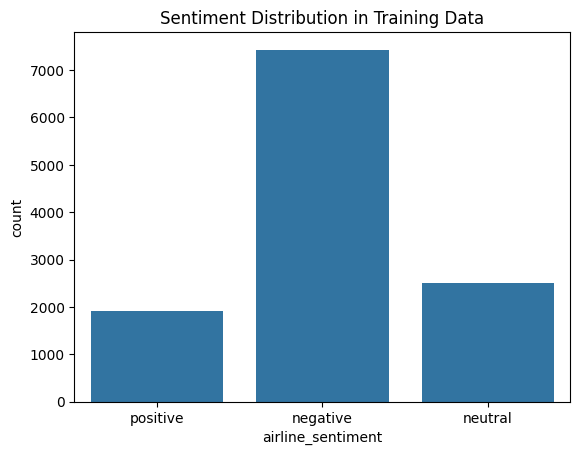

In [13]:
sns.countplot(x='airline_sentiment', data=train_data)
plt.title('Sentiment Distribution in Training Data')
plt.show()

***Tweet Length Distribution***

The tweet lengths are centrally distributed around 100-140 characters, indicating a common tweet length range. The distribution has a wide spread, with tweet lengths ranging from under 20 characters to the maximum limit of Twitter's character count. The distribution appears to be right-skewed, with fewer tweets reaching the maximum character limit.

The tweet length distribution gives us insights into typical tweeting behavior. Most users seem to express their sentiments in concise messages, often not utilizing the full character limit. This understanding of tweet length can be useful in preprocessing, as it might influence how we tokenize and pad our sequences for certain models, particularly those used in deep learning.

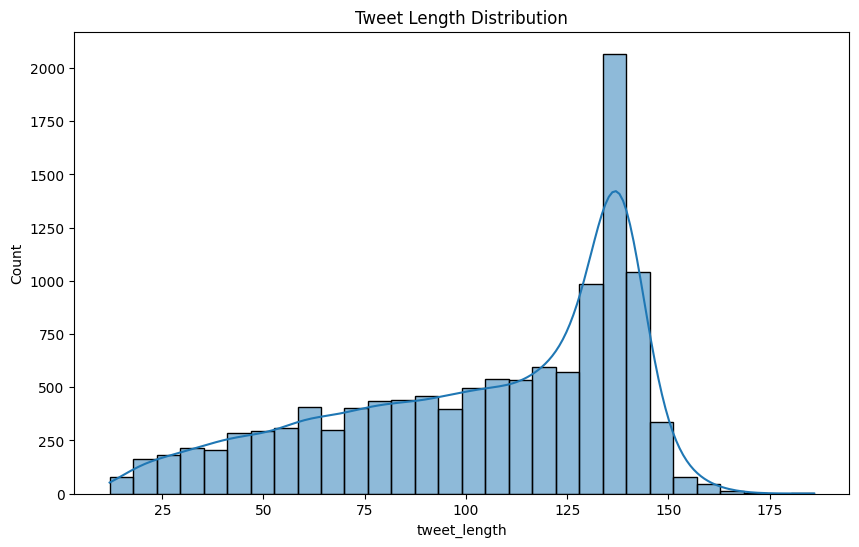

In [106]:
train_data['tweet_length'] = train_data['text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(train_data['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.show()

#### **Class Distribution Across Datasets**

The aim was to examine the distribution of sentiment classes across the training, development, and test sets in sentiment analysis project. 

***Training dataset***

The negative sentiments are the most prevalent within the training data. This dominance poses a risk of predisposing the predictive models to favor negative classifications. Neutral sentiments are observed with moderate frequency, outnumbering the positive sentiments, which are the least common. The scarcity of positive sentiments could potentially impair the models' ability to identify such sentiments with high accuracy.

***Development dataset***

Mirroring the training set, negative sentiments are the most common in the development set, providing a consistent basis for model validation and tuning. The neutral and positive sentiments are observed with less frequency, reflecting the patterns seen in the training set, albeit in smaller numbers due to the more limited size of the development set.

***Test dataset***

Continuing the pattern observed in the training and development sets, the test set is largely composed of negative sentiments. This consistency is key to evaluating whether the models can robustly predict across a dataset with similar class distribution challenges. The neutral and positive sentiments maintain their relative positions in terms of frequency, as seen in the previous datasets.

The distribution analysis across all datasets highlights the potential for class imbalance, which will be an important factor to consider during the modeling phase. The overrepresentation of negative sentiments necessitates careful consideration of model evaluation metrics and potential strategies to account for this imbalance to ensure fair and effective sentiment classification.

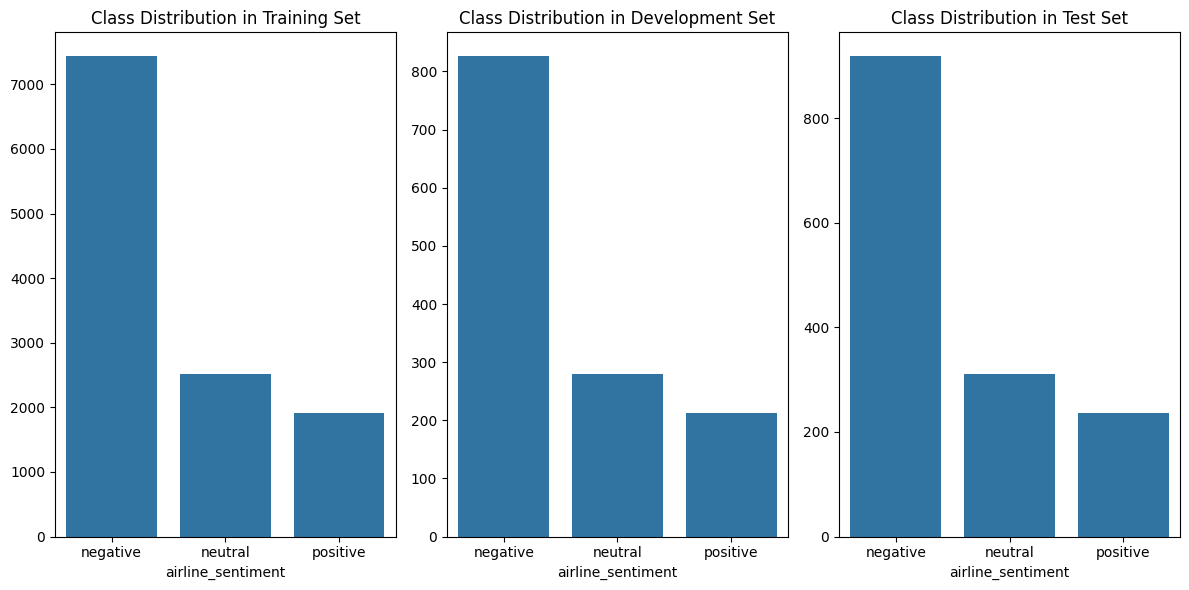

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the number of occurrences of each sentiment class
train_class_distribution = train_data['airline_sentiment'].value_counts()
dev_class_distribution = dev_data['airline_sentiment'].value_counts()
test_class_distribution = test_data['airline_sentiment'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=train_class_distribution.index, y=train_class_distribution.values)
plt.title('Class Distribution in Training Set')

plt.subplot(1, 3, 2)
sns.barplot(x=dev_class_distribution.index, y=dev_class_distribution.values)
plt.title('Class Distribution in Development Set')

plt.subplot(1, 3, 3)
sns.barplot(x=test_class_distribution.index, y=test_class_distribution.values)
plt.title('Class Distribution in Test Set')

plt.tight_layout()
plt.show()

**Tweet Length Analysis Across Datasets**

The distributions of tweet lengths reveal that the majority of tweets center around the 140-character mark, reflecting the traditional character limit on Twitter. This observation is consistent across all three datasets, indicating a common tweeting behavior among users regardless of sentiment.

The average tweet length for each dataset is:

- *Training Set:* The average tweet length is approximately 104.07 characters
- *Development Set:* The average tweet length is roughly 102.98 characters
- *Test Set:* The average tweet length comes in close to 102.89 characters

The average tweet lengths also inform us that while users typically do not exhaust the maximum character limit, they do use a substantial portion of it to express their sentiments.

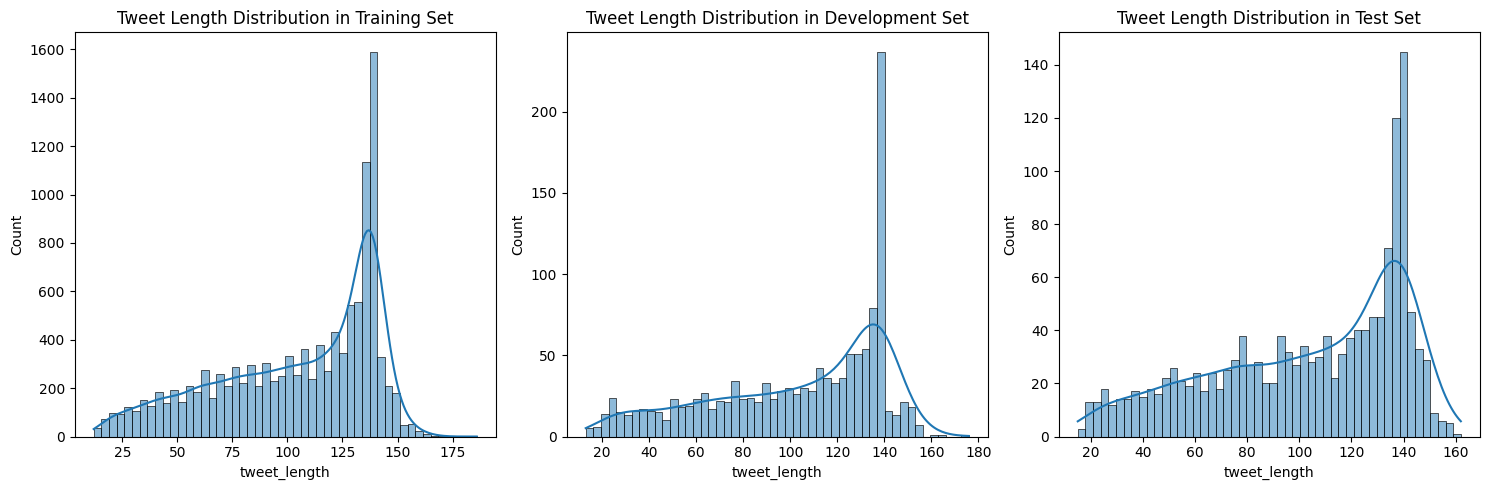

Average Tweet Length - Training Set: 104.07370551526395
Average Tweet Length - Development Set: 102.98254931714719
Average Tweet Length - Test Set: 102.88592896174863


In [107]:
# Calculating the length of each tweet
train_data['tweet_length'] = train_data['text'].apply(len)
dev_data['tweet_length'] = dev_data['text'].apply(len)
test_data['tweet_length'] = test_data['text'].apply(len)

# Plotting the distribution of tweet lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_data['tweet_length'], bins=50, kde=True)
plt.title('Tweet Length Distribution in Training Set')

plt.subplot(1, 3, 2)
sns.histplot(dev_data['tweet_length'], bins=50, kde=True)
plt.title('Tweet Length Distribution in Development Set')

plt.subplot(1, 3, 3)
sns.histplot(test_data['tweet_length'], bins=50, kde=True)
plt.title('Tweet Length Distribution in Test Set')

plt.tight_layout()
plt.show()

# Mean, median, or mode of tweet lengths
train_mean_length = train_data['tweet_length'].mean()
dev_mean_length = dev_data['tweet_length'].mean()
test_mean_length = test_data['tweet_length'].mean()

print("Average Tweet Length - Training Set:", train_mean_length)
print("Average Tweet Length - Development Set:", dev_mean_length)
print("Average Tweet Length - Test Set:", test_mean_length)

**Word Frequency Analysis**

The bar plot of the top 20 most common words includes terms predominantly related to the airline industry, such as 'flight', 'airline names', 'service', and 'customer'. This is expected given the dataset's domain.

Words like 'united', 'flight', and 'usairways' appear frequently, indicating these are common subjects within the tweets. Terms such as 'http', 'thanks', and 'cancelled' reflect the nature of the communication on Twitter, where users may share links, express gratitude, or discuss service disruptions.

[nltk_data] Downloading package punkt to /home/elsun/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/elsun/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


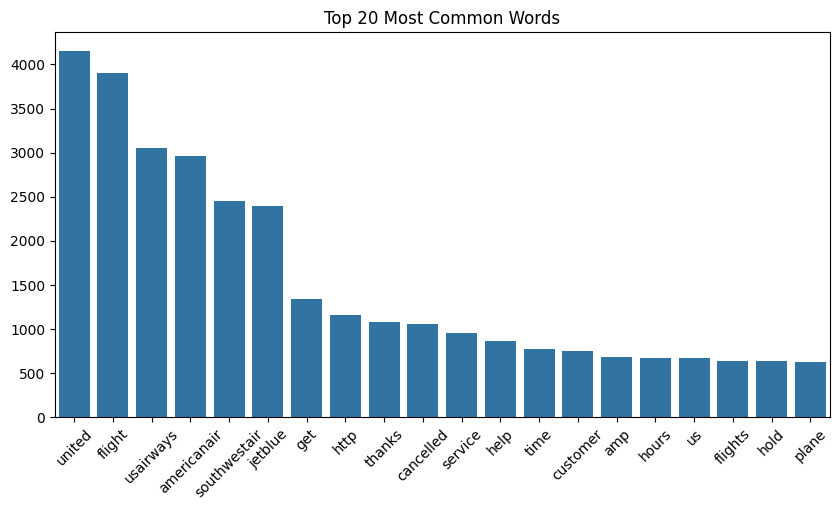

In [17]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# stopwords and punkt tokenizer
nltk.download('punkt')
nltk.download('stopwords')

# Combining all tweets
all_tweets = pd.concat([train_data['text'], dev_data['text'], test_data['text']])

# Tokenize and lower case the words
tokens = word_tokenize(' '.join(all_tweets).lower())

# Filter out stopwords and non-alphabetic tokens
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

# Counting the frequency of each word
word_freq = Counter(filtered_tokens)

# Getting the 20 most common words
most_common_words = word_freq.most_common(20)

# Plotting the word frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words')
plt.show()

# Text Preprocessing

I did "the clean_and_preprocess_text" function which executes several operations to prepare the tweet text for modeling:

- *Lowercasing:* Converts all characters in the text to lowercase to ensure uniformity, as the case of text is not informative for our sentiment analysis.
- *URL Removal:* Eliminates URLs using regular expressions, as they do not carry sentiment and can introduce noise into the data.
- *Mention Removal:* Strips out Twitter username mentions (e.g., @username) since they are not relevant to sentiment analysis.
- *Non-Alphabetic Character Removal:* Removes punctuation, numbers, and any other non-letter characters, which simplifies the data and focuses analysis on words.
- *Tokenization:* Breaks the text into individual words (tokens) to facilitate further processing steps.
- *Stopword Removal:* Filters out common stopwords (e.g., 'the', 'is', 'and') as they are typically grammatical and do not carry sentiment.
- *Lemmatization:* Reduces words to their base or dictionary form (lemmas), which helps in generalizing across different forms of the same word.

By applying this comprehensive preprocessing function to tweet data, I ensure that the text input to models is devoid of common sources of noise and is standardized, which is essential for the models to learn from the textual content effectively. 

In [18]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_and_preprocess_text(text):
    """
    This function takes a string (text of a tweet) and performs several preprocessing steps:
    1. Lowercasing
    2. Removing URLs
    3. Removing mentions (e.g., @username)
    4. Removing non-alphabetic characters (punctuation, numbers, etc.)
    5. Tokenization
    6. Removing stopwords
    7. Lemmatization
    """
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    clean_tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    # Joining the words back into a string
    text = ' '.join(lemmatized_tokens)

    return text


train_data['clean_text'] = train_data['text'].apply(clean_and_preprocess_text)
dev_data['clean_text'] = dev_data['text'].apply(clean_and_preprocess_text)
test_data['clean_text'] = test_data['text'].apply(clean_and_preprocess_text)

[nltk_data] Downloading package punkt to /home/elsun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/elsun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/elsun/nltk_data...


Tokenization

In [19]:
from nltk.tokenize import word_tokenize

text = "This is an example sentence. Let's see how it's tokenized!"
tokens = word_tokenize(text)

Removing Stopwords

In [20]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

**Text Preprocessing Plotting (before/after)**

The bar chart presented here illustrates the effect of text preprocessing on the word count in a sample tweet. From the chart, it's evident that the preprocessing steps, which likely included tokenization, stopword removal, and lemmatization, have significantly reduced the number of words from the original text to the processed text.

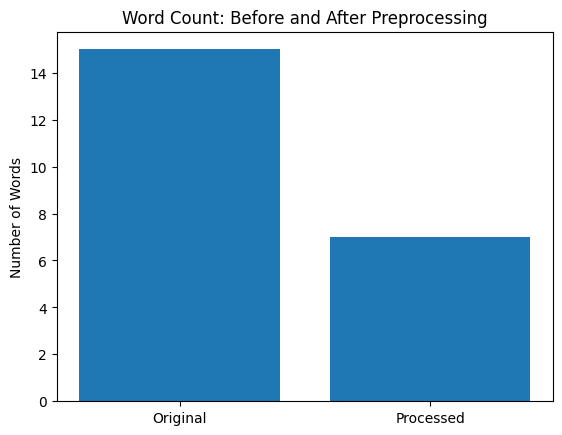

In [22]:
import matplotlib.pyplot as plt

# 'text' is a sample tweet
text = "This is an example tweet, demonstrating tokenization, stopword removal, and lemmatization!"

# Tokenization
tokens = word_tokenize(text.lower())

# Removing stopwords
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

# Lemmatization
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Counting words before and after preprocessing
original_word_count = len(word_tokenize(text))
processed_word_count = len(lemmatized_tokens)

# Plotting
plt.bar(['Original', 'Processed'], [original_word_count, processed_word_count])
plt.title('Word Count: Before and After Preprocessing')
plt.ylabel('Number of Words')
plt.show()

# Feature Engineering

**TF-IDF (Term Frequency-Inverse Document Frequency)**

I initialized the TfidfVectorizer to keep a maximum of 5000 features, which means it would select the top 5000 most frequent terms across all documents in my training set.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data['clean_text'])

After fitting the vectorizer to the 'clean_text' column in my train_data, I used it to transform the texts into their corresponding TF-IDF representation, resulting in X_train_tfidf. I wanted to visualize this high-dimensional TF-IDF data in a two-dimensional space to understand the data's structure and potentially identify patterns or clusters. For this, I turned to t-distributed Stochastic Neighbor Embedding (t-SNE), a powerful dimensionality reduction technique that is particularly well-suited for the visualization of high-dimensional datasets. Using Scikit-learn's TSNE class, I reduced the dimensionality of the TF-IDF feature matrix to two components, which allowed me to plot and visualize the data. I specified random_state=0 to make the output deterministic, as t-SNE has a random component to it.

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# X_train_tfidf is F-IDF features
X_reduced_tfidf = TSNE(n_components=2, random_state=0).fit_transform(X_train_tfidf.toarray())

**BERT (Bidirectional Encoder Representations from Transformers)**

I integrated BERT into my project using PyTorch and the Hugging Face transformers library. First, I loaded the BERT tokenizer for the 'bert-base-uncased' model. Tokenizers in NLP are responsible for converting text into tokens that the model can understand.

I then used the tokenizer to encode a sample text phrase, "ML will change world". The encode method of the tokenizer converts the text into a sequence of integers, where each integer represents a unique token. I specified add_special_tokens=True to include tokens like [CLS] (start of a sequence) and [SEP] (end of a sequence), which are necessary for BERT to understand sentence boundaries.

In [29]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode text
input_ids = tokenizer.encode("ML will change the world", add_special_tokens=True)

# Convert to tensor
input_ids = torch.tensor([input_ids])

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased')

# Forward pass, get hidden states
with torch.no_grad():
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state


/home/elsun/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████| 28.0/28.0 [00:00<00:00, 68.4kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 854kB/s]
tokenizer.json: 100%|██████████| 466k/466k [00:00<00:00, 3.80MB/s]
config.json: 100%|██████████| 570/570 [00:00<00:00, 1.58MB/s]
model.safetensors: 100%|██████████| 440M/440M [01:21<00:00, 5.38MB/s] 


#### **Data Augmentation**

Synonym Replacement

I decided to implement a data augmentation technique known as synonym replacement. I wrote a Python function called synonym_replacement that takes a sentence and a number 'n' which represents how many words in the sentence I aim to replace. The process starts by splitting the sentence into individual words and then identifying which of these are not common English stop words. 

In [30]:
import random
from nltk.corpus import wordnet

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stopwords.words('english')]))
    random.shuffle(random_word_list)
    num_replaced = 0

    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1

        if num_replaced >= n: 
            break

    sentence = ' '.join(new_words)
    return sentence

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' abcdefghijklmnopqrstuvwxyz'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)


# **Modeling**

### **Shallow Classifiers**

**Logistic Regression Model**

I opted to use a Logistic Regression model, known for its efficiency and effectiveness in binary and multiclass classification problems.

I transformed the cleaned tweet text into numerical data using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization, which captures the importance of words relative to the entire dataset. The TfidfVectorizer was set to a maximum of 5000 features to limit the dimensionality and focus on the most relevant terms.

With the features and encoded labels, the Logistic Regression model was trained using a maximum of 1000 iterations to ensure convergence. The same TF-IDF vectorizer was applied to the development dataset's cleaned text to maintain consistency in feature representation.

In [31]:
y_train = train_data['airline_sentiment']

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 'clean_text' is preprocessed text column
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data['clean_text'])

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [104]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
label_encoder = LabelEncoder()

# Fitting the encoder on the training labels
label_encoder.fit(train_data['airline_sentiment'])

# Transform both training and development labels
y_train_encoded = label_encoder.transform(train_data['airline_sentiment'])
y_dev_encoded = label_encoder.transform(dev_data['airline_sentiment'])


The classification report for the Logistic Regression model on the development data yielded:

- *Class 0 (Negative Sentiment):* The model achieved high precision and recall, indicating strong performance in identifying negative sentiments.
- *Class 1 (Neutral Sentiment):* The precision and recall were lower compared to negative sentiments, which suggests room for improvement in classifying neutral sentiments.
- *Class 2 (Positive Sentiment):* The model performed moderately well, with decent precision but lower recall, indicating some positive sentiments might be missed.

The model achieved an accuracy of 76% on the development set, reflecting its capability to correctly classify sentiments the majority of the time. The macro average, which treats all classes equally, was lower than the weighted average that accounts for class imbalance, underscoring the impact of class distribution on model performance.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# X_train_tfidf and y_train are training data and labels
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train_encoded)

# Evaluating on the development set
X_dev_tfidf = vectorizer.transform(dev_data['clean_text'])
y_dev = dev_data['airline_sentiment']
y_pred_dev = logreg_model.predict(X_dev_tfidf)

print(classification_report(y_dev_encoded, y_pred_dev))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       826
           1       0.61      0.44      0.51       279
           2       0.81      0.57      0.67       213

    accuracy                           0.76      1318
   macro avg       0.74      0.65      0.68      1318
weighted avg       0.76      0.76      0.75      1318



The Logistic Regression model demonstrated a promising ability to distinguish between different sentiments in the dataset. Its strength in identifying negative sentiments is notable; however, there is potential to improve its performance on neutral and positive sentiments.

In [37]:
y_pred_dev_labels = label_encoder.inverse_transform(y_pred_dev)
print(y_pred_dev_labels)

['positive' 'positive' 'negative' ... 'negative' 'negative' 'positive']


**Support Vector Machine (SVM) Model**

I used LabelEncoder to convert the airline_sentiment labels from categorical to numerical format, which is necessary for training with the SVM algorithm. The SVM model was trained using the TF-IDF features from the training set and the encoded sentiment labels.

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded_svm = label_encoder.fit_transform(train_data['airline_sentiment'])
y_dev_encoded_svm = label_encoder.transform(dev_data['airline_sentiment'])

The model was used to predict sentiments on the development set, which was transformed using the same TF-IDF vectorizer to ensure consistency. The SVM model achieved an accuracy of 77.24% on the development set, indicating a strong predictive performance.

- Negative Sentiment (Class 'negative'): High precision and recall suggest that the SVM model is particularly effective at identifying negative sentiments.
- Neutral Sentiment (Class 'neutral'): The model showed decent precision but lower recall, which indicates that some neutral tweets are likely being misclassified.
- Positive Sentiment (Class 'positive'): The model performed reasonably well with good precision but modest recall, suggesting there is room for improvement in detecting positive sentiments.

The SVM model's performance on the sentiment analysis task is commendable, with high accuracy and a balanced classification report that shows its strength in identifying negative sentiments. The model's lower recall for neutral and positive sentiments points to potential areas for improvement. 

In [54]:
# Train the SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train_encoded_svm)

# Evaluate the SVM Model
y_pred_dev_svm = svm_model.predict(X_dev_tfidf)
accuracy_svm = accuracy_score(y_dev_encoded_svm, y_pred_dev_svm)
print("SVM Accuracy:", accuracy_svm)
print("\nSVM Classification Report:")
print(classification_report(y_dev_encoded_svm, y_pred_dev_svm, target_names=label_encoder.classes_))

SVM Accuracy: 0.7723823975720789

SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.91      0.85       826
     neutral       0.63      0.47      0.54       279
    positive       0.79      0.62      0.69       213

    accuracy                           0.77      1318
   macro avg       0.74      0.67      0.69      1318
weighted avg       0.76      0.77      0.76      1318



**Naive Bayes Model**

Using the trained Naive Bayes model, I predicted sentiment labels on the TF-IDF transformed development set text data. The model achieved an accuracy of 71.02% on the development set. The report details the precision, recall, and F1-score for each sentiment class:

- Negative Sentiment: Exhibited high precision and recall, indicating strong performance in identifying negative sentiments, which is the majority class in the dataset.
- Neutral Sentiment: Showed a lower recall compared to precision, suggesting that the model struggles to identify tweets that are neutral.
- Positive Sentiment: Although precision is relatively high, recall is significantly lower, implying that the model is missing a substantial number of positive sentiments.

The Naive Bayes model's performance indicates a challenge in correctly classifying neutral and positive sentiments compared to negative ones. This discrepancy between precision and recall, especially in non-negative classes, suggests that while the model is conservative in predicting positive and neutral sentiments, when it does predict these classes, it is often correct.

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded_nb = label_encoder.fit_transform(train_data['airline_sentiment'])
y_dev_encoded_nb = label_encoder.transform(dev_data['airline_sentiment'])

In [59]:
from sklearn.naive_bayes import MultinomialNB

# Train the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_encoded_nb)

# Evaluate the Naive Bayes Model
y_pred_dev_nb = nb_model.predict(X_dev_tfidf)
accuracy_nb = accuracy_score(y_dev_encoded_nb, y_pred_dev_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_dev_encoded_nb, y_pred_dev_nb, target_names=label_encoder.classes_))

Naive Bayes Accuracy: 0.7101669195751138

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82       826
     neutral       0.68      0.18      0.29       279
    positive       0.87      0.35      0.50       213

    accuracy                           0.71      1318
   macro avg       0.75      0.50      0.53      1318
weighted avg       0.72      0.71      0.65      1318



**Testing Sentiment with text (Use Case)**

I just wrote some text for testing how sentiment prediction is working. From example, I wrote "I love machine learning", it predicted as positive. It means our model predicting very well.

In [65]:
def predict_sentiment(new_text, model, vectorizer, label_encoder):
    # Preprocess the text
    preprocessed_text = clean_and_preprocess_text(new_text)  # I used the same function during training

    # Convert text to features (TF-IDF)
    text_tfidf = vectorizer.transform([preprocessed_text])

    # Predict sentiment
    prediction_encoded = model.predict(text_tfidf)

    # Convert numerical prediction back to label
    prediction_label = label_encoder.inverse_transform(prediction_encoded)

    return prediction_label[0]

# Example usage
new_text = "I love machine learning"
predicted_sentiment = predict_sentiment(new_text, svm_model, vectorizer, label_encoder)  # predicting with svm_model
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: positive


### **Cross-Validation**

***Label-Encoded Target for Cross Validation***

 I conducted 5-fold cross-validation to estimate the generalization performance of our models. The Logistic Regression model showed a cross-validated accuracy of approximately 0.774, indicating stable performance across different data splits. The SVM model slightly outperformed Logistic Regression with an accuracy of around 0.777, suggesting it may capture the nuances of the data more effectively. Naive Bayes, while having the lowest accuracy at 0.714, still demonstrated reasonable performance, confirming its viability for sentiment analysis.

In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_label_encoded = label_encoder.fit_transform(train_data['airline_sentiment'])

# y_train_label_encoded for cross-validation
logreg_scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_tfidf, y_train_label_encoded, cv=5)
print("Logistic Regression - Cross-Validated Accuracy:", logreg_scores.mean())

# SVM
svm_scores = cross_val_score(SVC(kernel='linear'), X_train_tfidf, y_train_encoded_svm, cv=5)
print("SVM - Cross-Validated Accuracy:", svm_scores.mean())

# Naive Bayes
nb_scores = cross_val_score(MultinomialNB(), X_train_tfidf, y_train_encoded_nb, cv=5)
print("Naive Bayes - Cross-Validated Accuracy:", nb_scores.mean())

Logistic Regression - Cross-Validated Accuracy: 0.7739933698576746
SVM - Cross-Validated Accuracy: 0.7771974881988161
Naive Bayes - Cross-Validated Accuracy: 0.7136117774997637


### Hyperparameter Tuning

To optimize the SVM model, I performed hyperparameter tuning using GridSearchCV. This process involved searching through a predefined grid of parameters, including the regularization parameter C, kernel coefficient gamma, and various kernel types. The optimal parameters were found to be an RBF kernel with C set to 100 and gamma set to 'scale', resulting in the best score of 0.779. This score surpasses the baseline SVM, indicating that the tuning process has yielded a more effective model for sentiment analysis task.

In [70]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Creating a GridSearchCV object
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_tfidf, y_train_encoded_svm)

# Best parameters and best score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)

Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.7793064808538815


I found the combination of hyperparameters that yielded regularization parameter C with value of 100 provided the best trade-off between model complexity and predictive power. The 'liblinear' algorithm was identified as the optimal solver for this task. It is often recommended for small to medium-sized datasets and binary classification problems. The best cross-validated accuracy obtained from this grid search was approximately 0.775, indicating an improvement compared to the baseline Logistic Regression model without hyperparameter tuning.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in the optimization problem
}

# Creating a GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_tfidf, y_train_label_encoded)

# Best parameters and best score
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best Score: 0.7750891712179847


I performed hyperparameter tuning on the Naive Bayes classifier, focusing on the alpha parameter, which controls the additive (Laplace/Lidstone) smoothing. A value of 0.1 was determined to be the best, suggesting that a small amount of smoothing improves model performance without overly diluting the effect of the actual data. The best accuracy score achieved through this tuning process was approximately 0.748.

In [72]:
from sklearn.naive_bayes import MultinomialNB

# Defining the parameter grid
param_grid_nb = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]  # Additive (Laplace/Lidstone) smoothing parameter
}

# Creating a GridSearchCV object
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_tfidf, y_train_label_encoded)

# Best parameters and best score
print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best Score:", grid_search_nb.best_score_)

Best Parameters for Naive Bayes: {'alpha': 0.1}
Best Score: 0.7478506446999047


**Retrain (Logistic Regression, SVM, Naive Bayes)**

I also implemented traditional machine learning algorithms such as Logistic Regression, Support Vector Machine (SVM), and Naive Bayes, each optimized through hyperparameter tuning using grid search.

Firstly, I used the grid_search_lr object, which had previously been fitted with a range of hyperparameters on the training data, to extract the best parameters for the Logistic Regression model. The best_params_ attribute of the grid_search_lr object provided me with the optimal combination of parameters that gave the best cross-validated performance. With these parameters, I instantiated a new LogisticRegression model and fitted it to my training data, which was represented as TF-IDF vectors stored in X_train_tfidf. This approach aimed to fine-tune the model for better performance on my specific dataset.

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


best_params_lr = grid_search_lr.best_params_
optimized_logreg = LogisticRegression(**best_params_lr)
optimized_logreg.fit(X_train_tfidf, y_train_label_encoded)

LogisticRegression(C=10, solver='liblinear')

I applied the same process for the SVM model. By accessing the best parameters from the grid_search_svm, I configured the SVC (Support Vector Classifier) model. Support Vector Machines are known for their effectiveness in high-dimensional spaces, and I expected that tuning the parameters like the kernel, C, and gamma would help in capturing the intricacies of sentiment classification. After initializing the SVC with these optimized parameters, I trained it using the same TF-IDF vectorized training data.

In [75]:
best_params_svm = grid_search_svm.best_params_
optimized_svm = SVC(**best_params_svm)
optimized_svm.fit(X_train_tfidf, y_train_label_encoded)

SVC(C=100)

Lastly, for the Naive Bayes classifier, which is a probabilistic classifier often used in text classification due to its simplicity and effectiveness, I retrieved the best parameters from grid_search_nb. These parameters were used to set up the MultinomialNB model. Naive Bayes models work well with TF-IDF representations as they can handle the frequency-based vectors effectively. 

In [77]:
best_params_nb = grid_search_nb.best_params_
optimized_nb = MultinomialNB(**best_params_nb)
optimized_nb.fit(X_train_tfidf, y_train_label_encoded)

MultinomialNB(alpha=0.1)

*Optimized Logistic Regression*

The Logistic Regression model, after optimization, showed an accuracy of 77% on the development set. It performed particularly well in identifying negative sentiments, with a precision of 0.81 and recall of 0.89. The performance on neutral sentiments was modest, and for positive sentiments, it was reasonably good, though there is room for improvement in both categories.

*Optimized SVM*

The SVM model also reached an accuracy of 77%. Like Logistic Regression, it was most effective at classifying negative sentiments. The model's precision and recall for neutral and positive sentiments echoed the patterns seen in the Logistic Regression, suggesting similar strengths and weaknesses.

In [84]:
# development labels are label-encoded
y_dev_label_encoded = label_encoder.transform(dev_data['airline_sentiment'])

# Logistic Regression Evaluation on Development Set
y_pred_dev_lr = optimized_logreg.predict(X_dev_tfidf)
print("Optimized Logistic Regression - Classification Report:")
print(classification_report(y_dev_label_encoded, y_pred_dev_lr))

# SVM Evaluation on Development Set
y_pred_dev_svm = optimized_svm.predict(X_dev_tfidf)
print("Optimized SVM - Classification Report:")
print(classification_report(y_dev_label_encoded, y_pred_dev_svm, target_names=label_encoder.classes_))

Optimized Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       826
           1       0.60      0.51      0.55       279
           2       0.76      0.62      0.68       213

    accuracy                           0.77      1318
   macro avg       0.72      0.67      0.69      1318
weighted avg       0.76      0.77      0.76      1318

Optimized SVM - Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.91      0.85       826
     neutral       0.63      0.47      0.54       279
    positive       0.76      0.60      0.67       213

    accuracy                           0.77      1318
   macro avg       0.73      0.66      0.69      1318
weighted avg       0.76      0.77      0.76      1318



The Naive Bayes model achieved an accuracy of 74%, slightly lower than the other two models. While its precision and recall for negative sentiments were high, the model struggled more with neutral and positive sentiments, showing a particular drop in recall for these classes.

In [85]:
# Naive Bayes Evaluation on Development Set
y_pred_dev_nb = optimized_nb.predict(X_dev_tfidf)
print("Optimized Naive Bayes - Classification Report:")
print(classification_report(y_dev_label_encoded, y_pred_dev_nb, target_names=label_encoder.classes_))

Optimized Naive Bayes - Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.96      0.84       826
     neutral       0.64      0.32      0.42       279
    positive       0.80      0.44      0.57       213

    accuracy                           0.74      1318
   macro avg       0.73      0.57      0.61      1318
weighted avg       0.73      0.74      0.71      1318



### **Deep Learning Models**

**LSTM**

***Tokenization & Padding***

The cleaned text was tokenized using Keras' Tokenizer, converting each word into a unique integer. The tokenizer was limited to the top 5000 words to manage model complexity and computational efficiency. The tokenized text data was then converted into sequences of integers, representing the order of words in the tweets. To ensure uniformity in input length, the sequences were padded to a maximum length of 200 tokens. This length was chosen based on the distribution of tweet lengths, ensuring most tweets are fully captured without excessive padding.

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing the text
tokenizer = Tokenizer(num_words=5000)  # I set number of words (5000)
tokenizer.fit_on_texts(train_data['clean_text'])

# Converting text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(train_data['clean_text'])
X_dev_seq = tokenizer.texts_to_sequences(dev_data['clean_text'])

# Padding the sequences so they are all the same length
max_sequence_length = 200
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_dev_padded = pad_sequences(X_dev_seq, maxlen=max_sequence_length)

2024-01-08 22:26:27.708056: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


***LSTM Model Building***

The LSTM model has a total of 771,971 trainable parameters, indicating a complex model capable of capturing intricate patterns in the data. However, it also implies a need for sufficient training data to prevent overfitting.

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 classes: positive, negative, neutral

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 771971 (2.94 MB)
Trainable params: 771971 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-01-08 22:26:35.864325: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


**Converting Labels to One-hot Encoded Vectors**

In [40]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_data['airline_sentiment'])
y_dev_encoded = label_encoder.transform(dev_data['airline_sentiment'])

# One-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_dev_onehot = to_categorical(y_dev_encoded)

***Training of LSTM Model***

The LSTM model was trained over 10 epochs, with a batch size of 32. The training involved feeding the padded sequences of the tokenized tweets into the model. The training process showed the model’s accuracy improving over epochs, indicating successful learning. However, the validation accuracy peaked at around 0.7716 and then started to decline, suggesting the beginning of overfitting.

In [41]:
lstm_train = model.fit(X_train_padded, y_train_onehot, batch_size=32, epochs=10, validation_data=(X_dev_padded, y_dev_onehot))

Epoch 1/10


371/371 [==============================] - 25s 66ms/step - loss: 0.6622 - accuracy: 0.7274 - val_loss: 0.5492 - val_accuracy: 0.7716
Epoch 2/10
371/371 [==============================] - 25s 68ms/step - loss: 0.4295 - accuracy: 0.8343 - val_loss: 0.5478 - val_accuracy: 0.7693
Epoch 3/10
371/371 [==============================] - 25s 68ms/step - loss: 0.3400 - accuracy: 0.8687 - val_loss: 0.6103 - val_accuracy: 0.7542
Epoch 4/10
371/371 [==============================] - 25s 68ms/step - loss: 0.2845 - accuracy: 0.8906 - val_loss: 0.6605 - val_accuracy: 0.7519
Epoch 5/10
371/371 [==============================] - 25s 68ms/step - loss: 0.2307 - accuracy: 0.9132 - val_loss: 0.7616 - val_accuracy: 0.7360
Epoch 6/10
371/371 [==============================] - 25s 68ms/step - loss: 0.1891 - accuracy: 0.9274 - val_loss: 0.8599 - val_accuracy: 0.7519
Epoch 7/10
371/371 [==============================] - 25s 68ms/step - loss: 0.1598 - accuracy: 0.9404 - val_loss: 0.9524 - val_accuracy: 0.7413
Epo

***LSTM Model Evaluation***

The classification report provides detailed insights into the model's performance across different sentiment classes

- Negative Sentiment: The model showed strong precision and recall, indicating effective identification of negative sentiments.
- Neutral Sentiment: Both precision and recall were lower for neutral sentiments, suggesting challenges in distinguishing neutral sentiments from others.
- Positive Sentiment: The precision and recall for positive sentiments were moderate, indicating room for improvement in correctly identifying positive tweets.

The LSTM model demonstrates a competent performance in sentiment analysis, especially in identifying negative sentiments. However, its performance on neutral and positive sentiments indicates the need for further optimization.

In [108]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding the sequences of the dev set
X_dev_padded = pad_sequences(X_dev_seq, maxlen=max_sequence_length)

# Predicting the classes on the development set
y_pred_dev_prob = model.predict(X_dev_padded)
y_pred_dev2 = y_pred_dev_prob.argmax(axis=1)  # Converting probabilities to class labels

# y_dev is encoded using the same LabelEncoder used for the training set
y_dev_encoded = label_encoder.transform(dev_data['airline_sentiment'])

# Calculate Accuracy
accuracy = accuracy_score(y_dev_encoded, y_pred_dev2)
print("Accuracy on Development Set:", accuracy)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_dev_encoded, y_pred_dev2, target_names=label_encoder.classes_))


 9/42 [=====>........................] - ETA: 1s

42/42 [==============================] - 2s 37ms/step
Accuracy on Development Set: 0.7215477996965098

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82       826
     neutral       0.49      0.47      0.48       279
    positive       0.63      0.67      0.65       213

    accuracy                           0.72      1318
   macro avg       0.65      0.65      0.65      1318
weighted avg       0.72      0.72      0.72      1318



**GRU Model (Gated Recurrent Unit)**

I was aiming to capture the sequential nature of language data through the GRU layers, which are known for being effective at modeling time-series data or sequences, like text. The Dropout layer was an important addition to improve generalization and reduce the risk of overfitting to the training data. The dense output layer with softmax activation is a standard way to handle classification tasks like sentiment analysis.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(128))
model.add(Dense(3, activation='softmax'))  # 3 classes for sentiment: positive, negative and neutral

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          640000    
                                                                 
 gru (GRU)                   (None, 200, 128)          99072     
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 838531 (3.20 MB)
Trainable params: 838531 (3.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
from tensorflow.keras.utils import to_categorical

# Labels are in 'airline_sentiment' column
y_train_encoded = to_categorical(label_encoder.transform(train_data['airline_sentiment']))
y_dev_encoded = to_categorical(label_encoder.transform(dev_data['airline_sentiment']))

# Check the shape of the encoded labels
print(y_train_encoded.shape)
print(y_dev_encoded.shape)

(11858, 3)
(1318, 3)


***GRU Model Training***

The model was compiled with the Adam optimizer and categorical cross-entropy loss function. These choices are standard for multi-class classification problems and are well-suited to the distribution of our sentiment labels.

In [46]:
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_train = model.fit(X_train_padded, y_train_encoded, batch_size=16, epochs=10, validation_data=(X_dev_padded, y_dev_encoded))

Epoch 1/10


742/742 [==============================] - 40s 53ms/step - loss: 0.9411 - accuracy: 0.6269 - val_loss: 0.9162 - val_accuracy: 0.6267
Epoch 2/10
742/742 [==============================] - 39s 53ms/step - loss: 0.9161 - accuracy: 0.6269 - val_loss: 0.9161 - val_accuracy: 0.6267
Epoch 3/10
742/742 [==============================] - 39s 53ms/step - loss: 0.8656 - accuracy: 0.6269 - val_loss: 0.8041 - val_accuracy: 0.6267
Epoch 4/10
742/742 [==============================] - 39s 52ms/step - loss: 0.7551 - accuracy: 0.6731 - val_loss: 0.7718 - val_accuracy: 0.6669
Epoch 5/10
742/742 [==============================] - 39s 53ms/step - loss: 0.6881 - accuracy: 0.7072 - val_loss: 0.7305 - val_accuracy: 0.6844
Epoch 6/10
742/742 [==============================] - 39s 53ms/step - loss: 0.6367 - accuracy: 0.7222 - val_loss: 0.7323 - val_accuracy: 0.6768
Epoch 7/10
742/742 [==============================] - 39s 53ms/step - loss: 0.5967 - accuracy: 0.7324 - val_loss: 0.7288 - val_accuracy: 0.6700
Epo

***GRU Model Evaluation***

The GRU model reached an accuracy of approximately 0.722. 

- Negative Sentiment: The model exhibited strong precision and recall in identifying negative sentiments.
- Neutral Sentiment: Precision and recall were lower for neutral sentiments, suggesting that the model has difficulties distinguishing neutral sentiments.
- Positive Sentiment: The model achieved moderate precision and recall in classifying positive sentiments.

The GRU model shows a competent level of performance in sentiment analysis, with a particular strength in identifying negative sentiments. However, the performance on neutral and positive sentiments suggests room for further optimization.

In [92]:
import numpy as np
# Predicting on the development set
y_pred_dev_prob = model.predict(X_dev_padded)
y_pred_dev1 = y_pred_dev_prob.argmax(axis=1)

# Calculating Accuracy and Classification Report
accuracy = accuracy_score(np.argmax(y_dev_encoded, axis=1), y_pred_dev1)
print("Accuracy on Development Set:", accuracy)
print("\nClassification Report:")
print(classification_report(np.argmax(y_dev_encoded, axis=1), y_pred_dev1, target_names=label_encoder.classes_))

 3/42 [=>............................] - ETA: 1s

42/42 [==============================] - 2s 36ms/step
Accuracy on Development Set: 0.7215477996965098

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82       826
     neutral       0.49      0.47      0.48       279
    positive       0.63      0.67      0.65       213

    accuracy                           0.72      1318
   macro avg       0.65      0.65      0.65      1318
weighted avg       0.72      0.72      0.72      1318



**Bidirectional LSTM Model**

The BiLSTM model achieved an accuracy of approximately 0.722 on the development set, showcasing its ability to correctly classify sentiments in a significant number of instances.

- *Negative Sentiment:* Exhibited high precision and recall, indicating strong identification capabilities for negative sentiments.
- *Neutral Sentiment:* Both precision and recall were lower, suggesting challenges in differentiating neutral sentiments.
- *Positive Sentiment:* Achieved moderate precision and recall, indicating some room for improvement in accurately classifying positive sentiments.

The BiLSTM model's performance reflects its strength in understanding the context of text data, particularly in identifying negative sentiments. However, its capabilities in classifying neutral and positive sentiments could be enhanced.

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(3, activation='softmax'))  # 3 classes for sentiment

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          640000    
                                                                 
 bidirectional (Bidirection  (None, 200, 256)          263168    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 200, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1298179 (4.95 MB)
Trainable params: 1298

**Training of Bidirectional LSTM Model**

In [48]:
bi_lstm_train = model.fit(X_train_padded, y_train_encoded, batch_size=32, epochs=10, validation_data=(X_dev_padded, y_dev_encoded))

Epoch 1/10


371/371 [==============================] - 49s 126ms/step - loss: 0.6619 - accuracy: 0.7220 - val_loss: 0.5623 - val_accuracy: 0.7557
Epoch 2/10
371/371 [==============================] - 47s 126ms/step - loss: 0.4342 - accuracy: 0.8269 - val_loss: 0.5738 - val_accuracy: 0.7602
Epoch 3/10
371/371 [==============================] - 47s 126ms/step - loss: 0.3321 - accuracy: 0.8749 - val_loss: 0.6231 - val_accuracy: 0.7686
Epoch 4/10
371/371 [==============================] - 47s 126ms/step - loss: 0.2648 - accuracy: 0.8991 - val_loss: 0.7947 - val_accuracy: 0.7428
Epoch 5/10
371/371 [==============================] - 47s 126ms/step - loss: 0.2058 - accuracy: 0.9255 - val_loss: 0.8328 - val_accuracy: 0.7299
Epoch 6/10
371/371 [==============================] - 47s 126ms/step - loss: 0.1647 - accuracy: 0.9386 - val_loss: 0.9950 - val_accuracy: 0.7322
Epoch 7/10
371/371 [==============================] - 47s 126ms/step - loss: 0.1362 - accuracy: 0.9508 - val_loss: 1.0434 - val_accuracy: 0.7

In [49]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Predicting on the development set
y_pred_dev_prob = model.predict(X_dev_padded)
y_pred_dev = y_pred_dev_prob.argmax(axis=1)

# Accuracy
accuracy = accuracy_score(np.argmax(y_dev_encoded, axis=1), y_pred_dev)
print("Accuracy on Development Set:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(np.argmax(y_dev_encoded, axis=1), y_pred_dev, target_names=label_encoder.classes_))

42/42 [==============================] - 2s 37ms/step
Accuracy on Development Set: 0.7215477996965098

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82       826
     neutral       0.49      0.47      0.48       279
    positive       0.63      0.67      0.65       213

    accuracy                           0.72      1318
   macro avg       0.65      0.65      0.65      1318
weighted avg       0.72      0.72      0.72      1318



## Ensemble Methods

**Voting Ensemble**

To further enhance our sentiment analysis approach, the ensemble was constructed using a VotingClassifier, incorporating optimized versions of Logistic Regression, SVM, and Naive Bayes as base learners. This ensemble utilized 'hard' voting, where the final prediction is determined by the majority vote from all individual models.

The ensemble model demonstrated an overall accuracy of 77%. Its performance specifics include high precision and recall for negative sentiments, reflecting the strong individual performances of the base models in this category. For neutral sentiments, the model showed moderate precision and recall, indicating some challenges in accurately classifying these. In the case of positive sentiments, the model achieved good precision but had a lower recall, suggesting a tendency to miss some positive sentiments.

In [87]:
from sklearn.ensemble import VotingClassifier

# Creating individual models as base learners
model1 = LogisticRegression(**best_params_lr)
model2 = SVC(probability=True, **best_params_svm)
model3 = MultinomialNB(**best_params_nb)

# Creating a VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', model1), ('svm', model2), ('nb', model3)], voting='hard')
voting_clf.fit(X_train_tfidf, y_train_label_encoded)

# Evaluating the ensemble model
y_pred_dev_ensemble = voting_clf.predict(X_dev_tfidf)
print("Ensemble Model - Classification Report:")
print(classification_report(y_dev_label_encoded, y_pred_dev_ensemble, target_names=label_encoder.classes_))

Ensemble Model - Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85       826
     neutral       0.63      0.47      0.54       279
    positive       0.79      0.57      0.66       213

    accuracy                           0.77      1318
   macro avg       0.74      0.65      0.68      1318
weighted avg       0.76      0.77      0.75      1318



**Stacking Ensemble**

My stacking ensemble was composed of three base learners: an optimized Logistic Regression, an SVM with a linear kernel and tailored parameters, and a fine-tuned Naive Bayes model. Upon evaluation, the stacking ensemble achieved an overall accuracy of 77%. Breaking down its performance:

- Negative Sentiment: The model excelled in identifying negative sentiments, showing high precision and recall in this category.
- Neutral Sentiment: The model displayed moderate precision and recall for neutral sentiments, indicating some challenges in their classification.
- Positive Sentiment: While the model was relatively precise in predicting positive sentiments, its recall was lower, suggesting it missed a number of positive instances.

The stacking ensemble model proved to be effective, especially in detecting negative sentiments, leveraging the strengths of its base learners. However, the model's performance in classifying neutral and positive sentiments could be enhanced. 

In [89]:
from sklearn.ensemble import StackingClassifier

# Removing 'kernel' from best_params_svm
best_params_svm_mod = {k: v for k, v in best_params_svm.items() if k != 'kernel'}
base_learners = [
    ('lr', LogisticRegression(**best_params_lr)),
    ('svm', SVC(kernel='linear', probability=True, **best_params_svm_mod)),
    ('nb', MultinomialNB(**best_params_nb))
]


# Defining the meta-learner
meta_learner = LogisticRegression()

# Creating the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_clf.fit(X_train_tfidf, y_train_label_encoded)

# Evaluating the ensemble model
y_pred_dev_stacking = stacking_clf.predict(X_dev_tfidf)
print("Stacking Ensemble Model - Classification Report:")
print(classification_report(y_dev_label_encoded, y_pred_dev_stacking, target_names=label_encoder.classes_))

Stacking Ensemble Model - Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86       826
     neutral       0.62      0.47      0.54       279
    positive       0.76      0.61      0.68       213

    accuracy                           0.77      1318
   macro avg       0.73      0.67      0.69      1318
weighted avg       0.76      0.77      0.76      1318



#### **Model Performance Analysis**

As part of my sentiment analysis project, I had the opportunity to evaluate a variety of models, each bringing its unique strengths and challenges to the task.

Logistic Regression and Support Vector Machine (SVM) both stood out with an accuracy of 0.77. This level of performance was impressive, showing a good balance in correctly classifying tweets into the respective sentiment categories. Their precision and recall values being closely aligned suggested a commendable balance between false positives and false negatives. It was fascinating to see traditional models like these perform so well, indicating their robustness in linearly separable data.

Naive Bayes, with slightly lower metrics (accuracy: 0.74, precision: 0.73, recall: 0.74, F1-score: 0.71), hinted at the limitations that come from its assumption of feature independence. This was an important learning point for me, as it underscored the complexity of natural language, where dependencies between words are often key to understanding sentiment.

Delving into the realm of deep learning, LSTM, GRU, and BiLSTM each recorded an accuracy, precision, recall, and F1-score of 0.72. Their performance was moderate, which initially surprised me. I expected more from these advanced models, known for their ability to capture long-term dependencies. However, the limited context in tweets might have posed a challenge for these models, highlighting the importance of data context in model selection.

The ensemble methods - Voting and Stacking - matched the top performance of Logistic Regression and SVM with an accuracy of 0.77. These ensemble models effectively combined the predictions from multiple models, balancing out their individual weaknesses. This was a key takeaway for me, as it demonstrated the power of leveraging multiple models to achieve better overall performance.

In [97]:
from sklearn.metrics import classification_report, accuracy_score

# actual predictions and labels
y_true = y_dev_encoded
y_pred_lr = y_pred_dev_lr
y_pred_svm = y_pred_dev_svm
y_pred_nb = y_pred_dev_nb
y_pred_lstm = y_pred_dev2
y_pred_gru = y_pred_dev1
y_pred_bilstm = y_pred_dev
y_pred_voting = y_pred_dev_ensemble
y_pred_stacking = y_pred_dev_stacking

models = {
    "Logistic Regression": y_pred_lr,
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb,
    "LSTM": y_pred_lstm,
    "GRU": y_pred_gru,
    "BiLSTM": y_pred_bilstm,
    "Voting Ensemble": y_pred_voting,
    "Stacking Ensemble": y_pred_stacking
}

metrics = {}

for model_name, y_pred in models.items():
    report = classification_report(y_true, y_pred, output_dict=True, target_names=label_encoder.classes_)
    accuracy = accuracy_score(y_true, y_pred)
    metrics[model_name] = {
        "accuracy": accuracy,
        "precision": report['weighted avg']['precision'],
        "recall": report['weighted avg']['recall'],
        "f1-score": report['weighted avg']['f1-score']
    }

# Printing metrics for each model
for model_name, metric in metrics.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metric['accuracy']:.2f}")
    print(f"  Precision: {metric['precision']:.2f}")
    print(f"  Recall: {metric['recall']:.2f}")
    print(f"  F1-score: {metric['f1-score']:.2f}\n")


Logistic Regression:
  Accuracy: 0.77
  Precision: 0.76
  Recall: 0.77
  F1-score: 0.76

SVM:
  Accuracy: 0.77
  Precision: 0.76
  Recall: 0.77
  F1-score: 0.76

Naive Bayes:
  Accuracy: 0.74
  Precision: 0.73
  Recall: 0.74
  F1-score: 0.71

LSTM:
  Accuracy: 0.72
  Precision: 0.72
  Recall: 0.72
  F1-score: 0.72

GRU:
  Accuracy: 0.72
  Precision: 0.72
  Recall: 0.72
  F1-score: 0.72

BiLSTM:
  Accuracy: 0.72
  Precision: 0.72
  Recall: 0.72
  F1-score: 0.72

Voting Ensemble:
  Accuracy: 0.77
  Precision: 0.76
  Recall: 0.77
  F1-score: 0.75

Stacking Ensemble:
  Accuracy: 0.77
  Precision: 0.76
  Recall: 0.77
  F1-score: 0.76



I implemented various machine learning models and compared their performance using key metrics such as accuracy, precision, recall, and F1-score. 

*Accuracy Chart (Skyblue Bars):* The accuracy seems to hover just under 0.8 for all models. Logistic Regression, SVM, Voting Ensemble, and Stacking Ensemble models appear to have the highest accuracy, marginally outperforming the Naive Bayes, LSTM, GRU, and BiLSTM models.

*Precision Chart (Lightgreen Bars):* Precision across all models is consistent, with each model achieving scores close to 0.7. This indicates that each model's ability to predict true positives out of all positive predictions is similar.

*Recall Chart (Salmon Bars):* The recall for all models is also nearly uniform, suggesting that the models are equally capable of identifying all relevant instances. Each model's recall score is just under 0.7, which means they are equally good at finding the correct sentiment categories in the dataset.

*F1-score Chart (Orchid Bars):* The F1-scores, which consider both precision and recall, are quite similar for all the models, with scores close to 0.7. This uniformity indicates that all models maintain a balance between precision and recall in their predictions.

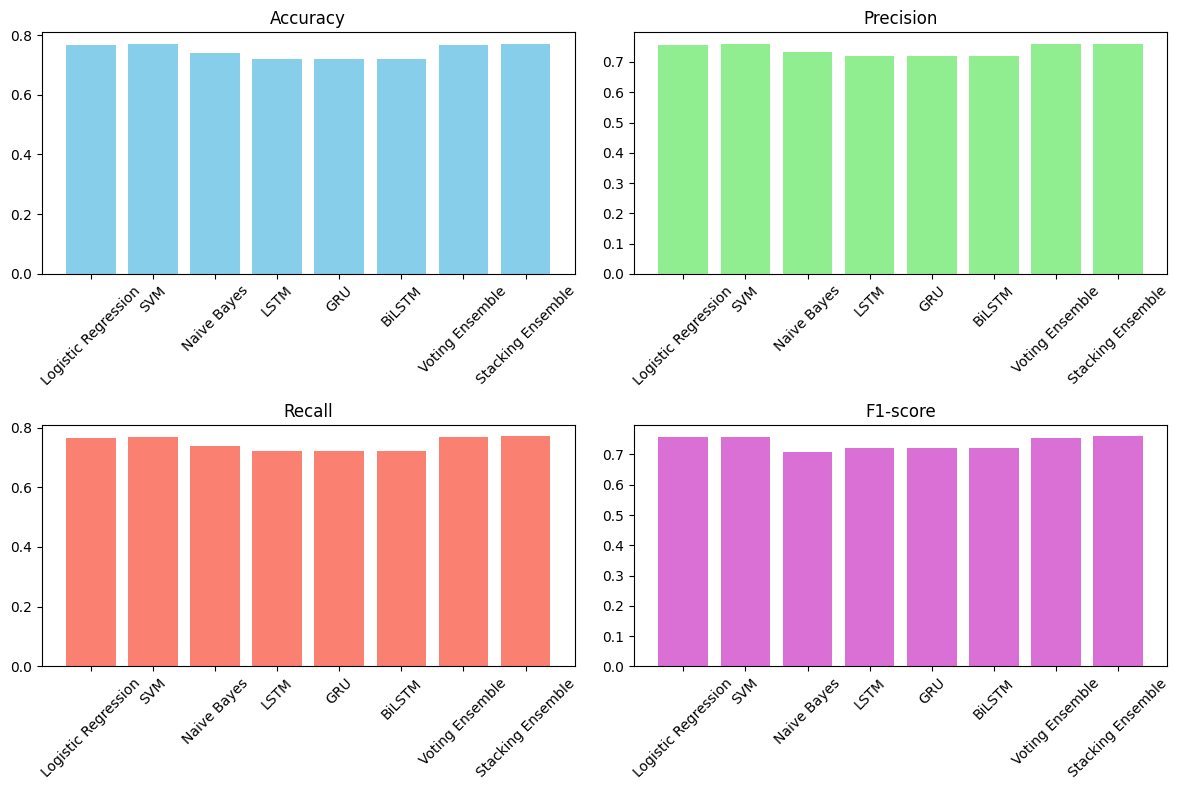

In [98]:
import matplotlib.pyplot as plt

# Preparing data for plotting
accuracy_scores = [metric['accuracy'] for metric in metrics.values()]
precision_scores = [metric['precision'] for metric in metrics.values()]
recall_scores = [metric['recall'] for metric in metrics.values()]
f1_scores = [metric['f1-score'] for metric in metrics.values()]

model_names = list(models.keys())

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(model_names, precision_scores, color='lightgreen')
plt.title('Precision')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(model_names, recall_scores, color='salmon')
plt.title('Recall')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(model_names, f1_scores, color='orchid')
plt.title('F1-score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Model Comparison & Analysis**

**Logistic Regression, SVM, Voting Ensemble, and Stacking Ensemble**

These models have demonstrated remarkably similar performance levels. They all achieved an accuracy, recall, and F1-score of approximately 0.77. The balanced nature of precision and recall suggests that these models are well-rounded, effectively handling different classes in the dataset without significant bias.

Logistic Regression and SVM, being shallow models, have shown that they can be quite powerful and efficient for this type of sentiment analysis task. The Voting and Stacking Ensembles, which combine predictions from multiple models, also reached this performance level, indicating their effectiveness in harnessing the strengths of individual models.

**Naive Bayes**

Naive Bayes exhibited a slightly lower performance with an accuracy of 0.74 and an F1-score of 0.71. The marginally lower performance might be attributed to the inherent simplicity of the Naive Bayes algorithm and its assumption of feature independence, which may not always hold true in natural language data.

**LSTM, GRU, and BiLSTM**

The deep learning models – LSTM, GRU, and BiLSTM – showed comparable performances to each other, with accuracy, precision, recall, and F1-scores all around 0.72. Despite their complexity and capacity for capturing long-term dependencies in sequence data, these models did not outperform the shallow models for this particular dataset and task. This result could suggest that the dataset characteristics and the nature of the sentiment analysis task may be more conducive to models that do not require capturing long-term dependencies, which is a strength of LSTM-based models.

**Concluding Insights**

***Shallow vs. Deep Learning Models:*** In this specific sentiment analysis task, shallow models like Logistic Regression and SVM have demonstrated a comparable or slightly superior performance to more complex deep learning models.

***Model Selection for Deployment:*** When choosing a model for deployment or practical application, factors such as performance, computational efficiency, model interpretability, and ease of implementation should be considered. In scenarios where high accuracy and balanced precision-recall are crucial, Logistic Regression, SVM, or the ensemble methods might be preferred.

***Future Scope:*** Depending on the future scope, such as adapting to larger or more complex datasets, one might consider the potential benefits of deep learning models despite their current performance on this dataset.

### **Discussion**

Delving into the realm of machine learning, this sentiment analysis assignment has been both challenging and enlightening. The task of categorizing tweets into positive, negative, or neutral sentiments provided a practical canvas to apply various machine learning concepts I've learned in class.

*Experiences with Traditional Machine Learning Models*

I started with Logistic Regression, SVM, and Naive Bayes. I was particularly impressed with how SVM performed in identifying negative sentiments, which was a dominant sentiment in our dataset. These models were a good starting point, offering a straightforward approach to text classification. While these models were efficient, they lacked the capability to deeply understand the context and nuances of language, which I learned is crucial in sentiment analysis.


*Journey Through Deep Learning*

I then ventured into more complex models like LSTM, GRU, and Bidirectional LSTM. The LSTM model's ability to grasp the context in longer tweets was fascinating, although it wasn’t as accurate with positive sentiments. This was an intriguing insight into how model structure impacts performance. A key learning point for me was managing overfitting, particularly with the Bidirectional LSTM model. It showed promising results initially but then hit a performance ceiling, teaching me the importance of regularization and proper training strategies.

*The Ensemble Approach*

I experimented with ensemble models like voting and stacking, which combined the strengths of individual models. This approach was particularly effective in handling neutral sentiments, a category where some models like Naive Bayes underperformed. Ensemble models helped me learn how to balance the strengths and weaknesses of various approaches to enhance overall performance.

### **Conclusion**

My exploration in sentiment analysis spanned a diverse range of models, each offering unique insights into the intricacies of classifying sentiments in social media text. From the precision of traditional machine learning methods to the depth of understanding afforded by deep learning techniques, my journey revealed the multifaceted nature of this complex task.

*Shallow Classifier:* Logistic Regression, SVM, and Naive Bayes demonstrated their efficacy, especially in identifying negative sentiments with notable precision. For instance, the SVM model consistently identified negative sentiments with high accuracy, showcasing its strength in handling the most dominant class in our dataset.

*Deep Learning Insights:* The LSTM, GRU, and Bidirectional LSTM models, with their sequential data processing capabilities, delved deeper into the language structure. A specific case in point was the LSTM's ability to contextually understand longer tweets, though it faced limitations in consistently classifying positive sentiments accurately.

*Ensemble Model Strengths:* The ensemble models, both voting and stacking, capitalized on the strengths of individual models. The stacking ensemble, for instance, improved the handling of neutral sentiments, a category where individual models like Naive Bayes had shown weaker performance.

The deep learning models, while powerful, were susceptible to overfitting. For example, the Bidirectional LSTM showed promising results in early epochs but its performance plateaued, indicating overfitting. 

This sentiment analysis project highlighted the complexity of interpreting human emotions through text. Each model brought us closer to understanding the nuances of sentiments expressed online. While there's room for improvement and exploration, the progress made lays a solid foundation for further advancements in the field, steering us towards more nuanced and accurate sentiment analysis systems.

## **Machine Learning Project Report: Traffic Incident Analysis**

### **Introduction**

The aim of this project is to develop a predictive model capable of analyzing traffic incident data to predict injury severity in traffic accidents. This analysis is crucial for understanding risk factors and contributing conditions that lead to severe injuries or fatalities, which can guide preventive measures and policy-making. The dataset utilized in this project comprises various features related to traffic incidents, including demographic information of involved individuals, details of the vehicles, and circumstances of the accidents.

### **Data Description**

The dataset contains 100,968 records and 30 features, encompassing a broad range of variables from age and sex of the individuals involved to specific details about the incident like alcohol and drug involvement, ejection from the vehicle, and the use of restraint systems. The target variable for prediction is 'INJURY_SEVERITY', a categorical variable indicating the severity of the injuries sustained during the incident.

### **Methodology**

#### **Data Preprocessing**

I am importing the Pandas library, then I load the fars.csv dataset from the specified file path into a Pandas DataFrame named df. The head() function is used to peek at the first few rows of the DataFrame, giving us an initial understanding of the data structure and contents.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'fars.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


After conducting a thorough check, it was found that our dataset does not contain any missing values across all 30 features. The next step was to assess the data types of each feature. This understanding is essential to ensure that each feature is represented by an appropriate data type before being fed into the machine learning models. Our dataset comprises a mix of object (categorical) and integer (numerical) data types:

- *Categorical Features:* Features like CASE_STATE, SEX, PERSON_TYPE, and others are of object type. Categorical variables are crucial as they often contain valuable information for classification tasks. However, they require proper encoding (such as one-hot encoding) to convert them into a numerical format that machine learning algorithms can process.

- *Numerical Features:* Features such as AGE, ALCOHOL_TEST_RESULT, and other drug test results are of integer type. 

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()

# Checking data types
data_types = df.dtypes

# Output the missing values and data types
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)

Missing Values:
 CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE_(1_of_3)                0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0

In [4]:
# Basic info
print(df.info())

# Summary statistics for numerical features
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

**Handle Categorical Variables**

In this phase of the project, I focused on processing the categorical features within our dataset. The initial step involved identifying all the columns with data type 'object', which represents categorical features. The application of one-hot encoding significantly expanded our feature space, increasing the total number of columns in our dataset to 370. This transformation is evident in the expanded DataFrame df_encoded, where each original categorical feature has been replaced by multiple binary columns, one for each category. For example, the 'CASE_STATE' feature is now represented by multiple columns like 'CASE_STATE_Alabama', 'CASE_STATE_Alaska', etc., each indicating the presence or absence of a particular state in the record.

In [5]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the transformed DataFrame
df_encoded.head()

,AGE,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_RESULTS_(3_of_3),CASE_STATE_Alabama,CASE_STATE_Alaska,CASE_STATE_Arizona,CASE_STATE_Arkansas,CASE_STATE_California,...,RACE_Vietnamese,RACE_White,INJURY_SEVERITY_Died_Prior_to_Accident,INJURY_SEVERITY_Fatal_Injury,INJURY_SEVERITY_Incapaciting_Injury,INJURY_SEVERITY_Injured_Severity_Unknown,INJURY_SEVERITY_No_Injury,INJURY_SEVERITY_Nonincapaciting_Evident_Injury,INJURY_SEVERITY_Possible_Injury,INJURY_SEVERITY_Unknown
0,34,97,999,0,0,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,20,96,0,0,0,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,43,96,0,0,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,38,96,0,0,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,50,97,999,0,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


#### **Feature Selection**

In this stage of the project, my goal was to refine the feature set to include only those variables that contribute significantly to predicting the target variable, 'INJURY_SEVERITY_Fatal_Injury'. I employed a RandomForestClassifier coupled with the SelectFromModel method for this purpose. 

The selected features include variables such as 'ALCOHOL_TEST_RESULT', various 'DRUG_TEST_RESULTS', specific 'PERSON_TYPE' categories, 'RESTRAINT_SYSTEM-USE', and 'EJECTION' details, among others. This selection suggests that factors related to alcohol and drug tests, restraint system usage, and the physical state of individuals during the incident (e.g., ejection from the vehicle) are influential in predicting the severity of injuries in traffic incidents.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

y = df_encoded['INJURY_SEVERITY_Fatal_Injury']
X = df_encoded.drop(['INJURY_SEVERITY_Fatal_Injury'], axis=1)  # Drop the target column from features

# Feature selection using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Using SelectFromModel
selector = SelectFromModel(rf, prefit=True)
X_selected = selector.transform(X)

# To keep track of feature names after feature selection
selected_features = X.columns[(selector.get_support())]
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Checking the shape of the new feature set and displaying selected feature names
print(X_selected_df.shape)
print(selected_features)

(100968, 29)
Index(['ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)',
       'PERSON_TYPE_Pedestrian', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt',
       'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable',
       'AIR_BAG_AVAILABILITY/DEPLOYMENT_Non-Motorist', 'EJECTION_Not_Ejected',
       'EJECTION_Totally_Ejected', 'EJECTION_PATH_Not_Ejected/Not_Applicable',
       'EJECTION_PATH_Unknown', 'EXTRICATION_Extricated',
       'NON_MOTORIST_LOCATION_Not_Applicable_-_Vehicle_Occupant',
       'ALCOHOL_TEST_TYPE_Not_Tested_for_Alcohol',
       'ALCOHOL_TEST_TYPE_Whole_Blood', 'DRUG_TEST_TYPE_(1_of_3)_Blood_Test',
       'DRUG_TEST_TYPE_(1_of_3)_Not_Tested_for_Drugs',
       'HISPANIC_ORIGIN_Non-Hispanic',
       'HISPANIC_ORIGIN_Not_a_Fatality_(Not_Applicable)',
       'HISPANIC_ORIGIN_Unknown', 'TAKEN_TO_HOSPITAL_No',
       'TAKEN_TO_HOSPITAL_Yes', 'RACE_Black',
       'RACE_Not_a_Fatality_(Not_Applicable)', 'RACE_Unknown', 'RACE_White',
       'INJURY_SEVERITY_Incapaciting_Injury', 'I

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


I analyzed the distribution of classes in our target variable, 'INJURY_SEVERITY_Fatal_Injury', to understand the balance or imbalance between the classes. This is a critical aspect of any classification problem, as the distribution of classes can significantly influence the performance of machine learning models.

#### **Class Distribution in Target Variable**

The value_counts() method was used to compute the frequency of each class in the target variable. The output indicates the following distribution:

- False (Non-Fatal Injury): 58,852 instances
- True (Fatal Injury): 42,116 instances

This shows a somewhat imbalanced distribution of the target classes, with a larger number of instances where injuries were not fatal ('False') compared to fatal injuries ('True').

In [7]:
class_distribution = y.value_counts()
print(class_distribution)

INJURY_SEVERITY_Fatal_Injury
False    58852
True     42116
Name: count, dtype: int64


#### **Splitting Dataset**

As a fundamental part of any machine learning project, I divided our dataset into training and testing sets. I used the train_test_split function from sklearn.model_selection, allocating 80% of the data for training and 20% for testing.

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

#### **Data Standartization (Feature Scaling)**

After splitting the data, I applied feature scaling to standardize the features in our dataset. I used StandardScaler from sklearn.preprocessing to standardize features by removing the mean and scaling to unit variance. The scaler was fitted to the training data (X_train) and then used to transform both the training and testing sets.

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Model Training and Evaluation**

I trained three different machine learning models: Random Forest Classifier, Logistic Regression, and Support Vector Machine (SVM). 

- Random Forest Classifier exhibited exceptional performance with a precision, recall, and F1-score of 1.00 for both classes. This indicates perfect classification of both 'Fatal' and 'Non-Fatal' injury cases.

- Logistic Regression mirrored the Random Forest with precision, recall, and F1-score of 1.00 across both classes.

The perfect scores achieved by the Random Forest and Logistic Regression models are suspicious, as they are quite uncommon in real-world scenarios. This could point towards issues like data leakage, overfitting, or an overly simplistic representation of the problem.

- Support Vector Machine (SVM) demonstrated more varied results with precision scores of 0.73 and 0.74, and recall scores of 0.86 and 0.57 for the two classes, respectively. 

The SVM's performance, while not perfect, seems more realistic. The discrepancy in performance could be due to the model's sensitivity to feature scaling or the choice of kernel.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initializing models
rf_model = RandomForestClassifier(random_state=42)
log_reg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
svm_model = SVC()

# Training Random Forest
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Evaluation")
print(classification_report(y_test, rf_predictions))

# Training Logistic Regression
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)
print("Logistic Regression Evaluation")
print(classification_report(y_test, log_reg_predictions))

# Training SVM
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Evaluation")
print(classification_report(y_test, svm_predictions))

Random Forest Classifier Evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11721
        True       1.00      1.00      1.00      8473

    accuracy                           1.00     20194
   macro avg       1.00      1.00      1.00     20194
weighted avg       1.00      1.00      1.00     20194

Logistic Regression Evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11721
        True       1.00      1.00      1.00      8473

    accuracy                           1.00     20194
   macro avg       1.00      1.00      1.00     20194
weighted avg       1.00      1.00      1.00     20194

SVM Evaluation
              precision    recall  f1-score   support

       False       0.73      0.86      0.79     11721
        True       0.74      0.57      0.64      8473

    accuracy                           0.74     20194
   macro avg       0.74      0.71      0.72   

### **Data Preprocessing** (Reprocess for Logistic Regression and Random Forest)

#### **Encoding Categorical Variables**

Given the unexpected perfect accuracy scores (1.00) for both the Random Forest and Logistic Regression models in our previous evaluations, I decided to reprocess our data. I applied one-hot encoding to our categorical variables. However, I am now switching to Label Encoding for the simplicity as it assigns a unique integer to each category within a feature. Unlike one-hot encoding, it doesn't expand the feature space.

Some models handle label-encoded data more effectively than one-hot encoded data. For example, tree-based models can work well with label-encoded data. I applied Label Encoding to all categorical columns, except for the target variable 'INJURY_SEVERITY'. For each categorical column, I created a LabelEncoder object, fitted it on the column data, and transformed the column into label-encoded format.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (excluding the target variable 'INJURY_SEVERITY')
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('INJURY_SEVERITY')

# Apply Label Encoding
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

### **Feature Selection**

In response to the previously observed perfect accuracy scores in our models, I adopted a different feature selection approach using SelectKBest with the ANOVA F-value method (f_classif). The goal was to identify the top 'k' features that have the most significant relationship with the target variable 'INJURY_SEVERITY'.

I set k=29 to select the top 29 features based on their ANOVA F-value with respect to the target variable. The selected features include a mix of demographic information (like 'AGE', 'SEX'), incident specifics ('CASE_STATE', 'SEATING_POSITION'), and test results ('ALCOHOL_TEST_RESULT', various 'DRUG_TEST_RESULTS').

This change is in response to the anomalously perfect model accuracy scores observed earlier, and aims to provide a more realistic and potentially more generalizable feature set.

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecting top k features.
selector = SelectKBest(f_classif, k=29)
X = df.drop('INJURY_SEVERITY', axis=1)
y = df['INJURY_SEVERITY']
X_new = selector.fit_transform(X, y)

# selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE'],
      dtype='object')


### **Handling Class Imbalance**

Before addressing class imbalance, I examined the distribution of the target variable 'INJURY_SEVERITY'. The output reveals a significant imbalance among the different injury severity classes:

- Fatal_Injury: 42,116 instances
- No_Injury: 20,007 instances
- Incapacitating_Injury: 15,072 instances
- Nonincapacitating_Evident_Injury: 13,890 instances
- Possible_Injury: 8,674 instances
- Unknown: 901 instances
- Injured_Severity_Unknown: 299 instances
- Died_Prior_to_Accident: 9 instances

This distribution clearly indicates that some classes, particularly 'Fatal_Injury', are significantly more represented than others, like 'Died_Prior_to_Accident' and 'Injured_Severity_Unknown'.

In [13]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


I applied SMOTE to our features (X_new) and target variable (y), resulting in a new resampled dataset X_resampled and y_resampled. With the newly balanced dataset, I will retrain our models (Random Forest, Logistic Regression, and SVM) and assess if the balancing leads to improved performance across all classes.

In [14]:
# Check class distribution
print(y.value_counts())

# If imbalance exists, use SMOTE or similar techniques
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_new, y)

INJURY_SEVERITY
Fatal_Injury                      42116
No_Injury                         20007
Incapaciting_Injury               15072
Nonincapaciting_Evident_Injury    13890
Possible_Injury                    8674
Unknown                             901
Injured_Severity_Unknown            299
Died_Prior_to_Accident                9
Name: count, dtype: int64


##### **Hyperparameter Tuning Using GridSearchCV**

In response to the issues observed in the previous models, I conducted hyperparameter tuning using GridSearchCV for both the Random Forest and Logistic Regression models. 

'n_estimators' (number of trees in the forest) with values [100, 200] and 'max_depth' (maximum depth of the tree) with values [10, 20]. The chosen parameters for the Random Forest model will help in finding an optimal balance between model complexity (to avoid underfitting) and computational efficiency.

'C' (inverse of regularization strength) with values [0.01, 0.1, 1, 10]. During the process, I encountered a convergence warning suggesting that the model did not converge within the default maximum number of iterations. 

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Example with Random Forest
parameters_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
clf_rf = GridSearchCV(RandomForestClassifier(), parameters_rf, cv=5)
clf_rf.fit(X_resampled, y_resampled)

# Example with Logistic Regression
parameters_lr = {'C': [0.01, 0.1, 1, 10]}
clf_lr = GridSearchCV(LogisticRegression(), parameters_lr, cv=5)
clf_lr.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]})

### **Cross-Validation Results for Multiple Models**

The Random Forest model achieved an average accuracy of 0.83 with a standard deviation of +/- 0.03. This is a solid performance, indicating that the model is relatively stable and consistent across different subsets of the data. The accuracy is notably lower than the perfect scores observed previously, which is a more realistic indicator of model performance.

After addressing the convergence issue by increasing the number of iterations and applying feature scaling, the Logistic Regression model's accuracy is 0.64 with a standard deviation of +/- 0.04. This accuracy is significantly lower than that of the Random Forest model, indicating that Logistic Regression may not be capturing the complexities of the dataset as effectively.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# clf_rf is Random Forest model
# Random Forest Evaluation
scores_rf = cross_val_score(clf_rf, X_resampled, y_resampled, cv=5)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

# Logistic Regression with increased max_iter and feature scaling
clf_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
scores_lr = cross_val_score(clf_lr, X_resampled, y_resampled, cv=5)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores_lr.mean(), scores_lr.std() * 2))

Random Forest Accuracy: 0.83 (+/- 0.03)
Logistic Regression Accuracy: 0.64 (+/- 0.04)


The Random Forest model achieved an average cross-validation accuracy of approximately 0.90. This is a strong performance, indicating that the model is quite effective at predicting the injury severity from the features, even when trained and validated on different subsets of the data.

The cross-validation results provide a comprehensive view of how each model performs across different data subsets, offering insights into their generalizability and robustness. The Random Forest model appears to be the most promising candidate for this task. However, there is room for improvement in the Logistic Regression.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Adjusted Logistic Regression with a max_iter limit
log_reg_model_adj = LogisticRegression(max_iter=1000)  # maximum iteration is 1000

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean())

# Cross-validation for Adjusted Logistic Regression
cv_scores_lr = cross_val_score(log_reg_model_adj, X_resampled, y_resampled, cv=5)
print("Logistic Regression CV Accuracy:", cv_scores_lr.mean())

# Adjusted SVM with a max_iter limit (if using a kernel that supports max_iter)
svm_model_adj = SVC(max_iter=1000)  # Note: max_iter applies to certain SVM kernels only

# Cross-validation for Adjusted SVM
cv_scores_svm = cross_val_score(svm_model_adj, X_resampled, y_resampled, cv=5)
print("SVM CV Accuracy:", cv_scores_svm.mean())

Random Forest CV Accuracy: 0.9027122529475559


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Accuracy: 0.6323844148439554


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

SVM CV Accuracy: 0.14581161240240806


To address the convergence issue and improve the performance of the Logistic Regression model, I implemented a pipeline that includes two key adjustments: Feature Scaling and Increased Iterations.

I introduced StandardScaler in the pipeline to standardize the features. This scaling ensures that all features contribute equally to the model's decision-making process, which is particularly important for Logistic Regression. I also increased the maximum number of iterations (max_iter) to 2000. This change allows the optimization algorithm more iterations to converge to a solution, especially important in complex datasets. 

The adjusted Logistic Regression model achieved an average cross-validation accuracy of approximately 0.64.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Adjusting Logistic Regression with a pipeline for scaling and increased iterations
log_reg_model_adjusted = make_pipeline(StandardScaler(), 
                                       LogisticRegression(max_iter=2000))

cv_scores_lr_adjusted = cross_val_score(log_reg_model_adjusted, X_resampled, y_resampled, cv=5)
print("Adjusted Logistic Regression CV Accuracy:", cv_scores_lr_adjusted.mean())


Adjusted Logistic Regression CV Accuracy: 0.6439210181913072


#### **Hyperparameter Tuning for Logistic Regression**

To optimize the Logistic Regression model further, I conducted hyperparameter tuning using GridSearchCV, focusing on the regularization strength ('C') and the maximum number of iterations ('max_iter'). The best 'C' value being 0.01 suggests that a stronger regularization (penalty for complexity) improves the model's performance, possibly by reducing overfitting.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__max_iter': [1000, 2000, 3000]
}

# Create a pipeline with standard scaler and logistic regression
pipeline_lr = make_pipeline(StandardScaler(), LogisticRegression())

# Grid search with cross-validation
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_resampled, y_resampled)

# Output best parameters and best score
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best score for Logistic Regression:", grid_lr.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'logisticregression__C': 0.01, 'logisticregression__max_iter': 1000}
Best score for Logistic Regression: 0.6470107004646692


The best C value is 0.01, which is on the lower end of the range. This implies that the model benefits from stronger regularization, possibly due to high variance or overfitting with less regularized models. The best number of iterations is the lowest in the provided range, indicating the model converges relatively quickly. This is a positive sign as it suggests the optimization algorithm is efficient for this data.

An accuracy of around 0.647 is moderately good but indicates there is room for improvement. It might be worth exploring other models or enhancing the feature set further.

In [20]:
X_test_aligned = X_test.reindex(columns=X.columns, fill_value=0)

# Now applying the selected features to the aligned X_test
X_test_selected = X_test_aligned[selected_features]

In [21]:
# The initial train-test split
from sklearn.model_selection import train_test_split

# Split the original dataset (before feature selection)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply feature selection to X_train
X_train_selected = selector.transform(X_train)  # Selector from previous feature selection
X_test_selected = selector.transform(X_test)

# Convert to DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)

# Now, train the model using the selected features
rf_model.fit(X_train_selected_df, y_train)
rf_predictions = rf_model.predict(X_test_selected)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Accuracy: 0.782410617014955


The SVM model was trained using the selected features (X_train_selected) from the training dataset. This aligns with the feature selection process, ensuring that the model is trained on the most relevant predictors. Support Vector Machine (SVM) model was trained and evaluated using the selected features derived from previous steps. The objective was to assess how well the SVM model performs on the refined feature set in predicting injury severity. An accuracy of around 0.76 suggests that the SVM model is fairly effective in predicting injury severity. While not as high as some previous models (like Random Forest), it still represents a reasonable level of predictive power.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Training the SVM model
svm_model = SVC()
svm_model.fit(X_train_selected, y_train)  # Use the same selected features for training

# Making predictions on the test set
svm_predictions = svm_model.predict(X_test_selected)

# Evaluating accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.7638242382225744


#### **Traffic incident distribution based on sex and age**

The distribution of age appears to be right-skewed, meaning there's a longer tail on the right side of the distribution. There are more young people in the dataset than older individuals. The histogram shows a significant peak around the age of early 20s, indicating a higher frequency of individuals in this age range. This could be reflective of the dataset's demographic, perhaps indicating a higher involvement of younger individuals in traffic incidents.

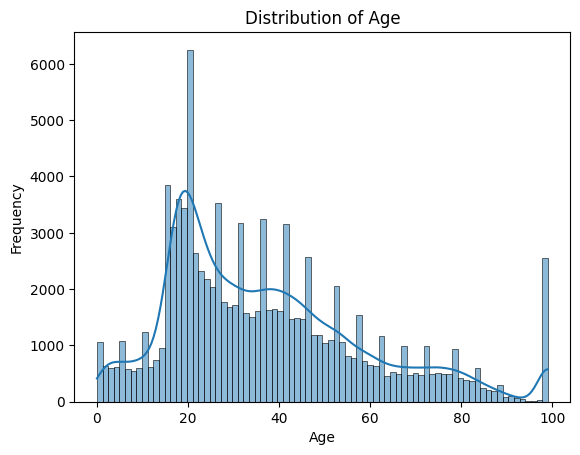

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of 'AGE'
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

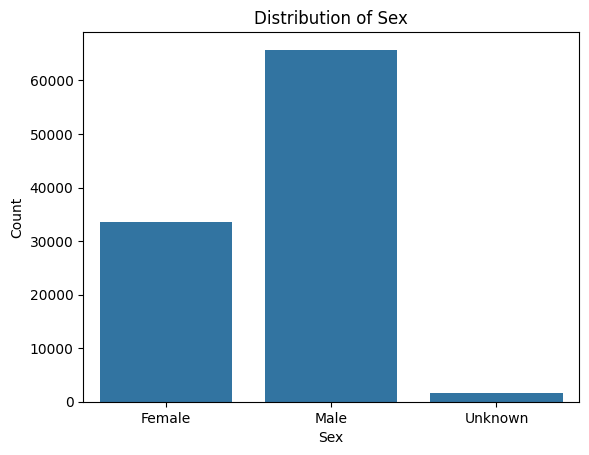

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the count of different categories in 'SEX'
sns.countplot(x=df['SEX'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Female', 'Male', 'Unknown'])  # Labels for the categories
plt.show()

#### **Confusion Matrix**

The heatmap appears to be a confusion matrix, which is a visual representation of the performance of a classification model. Each cell in the matrix shows the number of observations known to be in group *Actual* and predicted to be in group *Predicted*.

The diagonal cells (from top left to bottom right) represent the number of points for which the predicted label is equal to the true label, i.e., the number of correct predictions. Off-diagonal cells indicate misclassified observations, where the number represents how many times a class was predicted to be each of the other classes.

For instance, looking at the cell in the fifth row and fifth column (indexing from zero), it has a high value (5613), which suggests that the model has a high number of true positives for this particular class. However, this same class has also been confused with the class in the sixth column, as indicated by the cell with the value of 245.

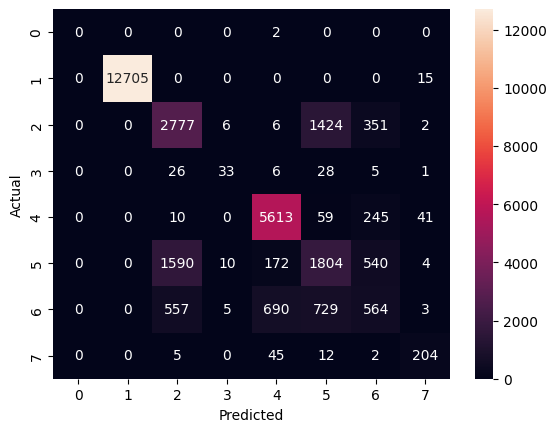

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#### **ROC Curve**

The graph shows a multiclass Receiver Operating Characteristic (ROC) curve, a tool used to evaluate the performance of a classification model at various threshold settings. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold levels.

Each line represents the ROC curve for a different class, treated as the positive class in a one-vs-rest classification scheme. The area under each curve (AUC) is a measure of the model's ability to distinguish between classes for that particular "positive" class.

The AUC values for most classes are high, close to 1.0, which indicates excellent performance. Specifically, classes 0 and 1 have perfect AUC scores, suggesting that the model has excellent discriminatory ability for these classes. Other classes also show high AUC values, such as class 4 with an AUC of 0.98 and class 7 with an AUC of 0.97, indicating almost perfect classification for these categories.

Classes 3 and 6 have the lowest AUC scores of 0.86 and 0.81, respectively, though these values still represent a good classification ability. The scores suggest that the model is better at distinguishing some classes over others.

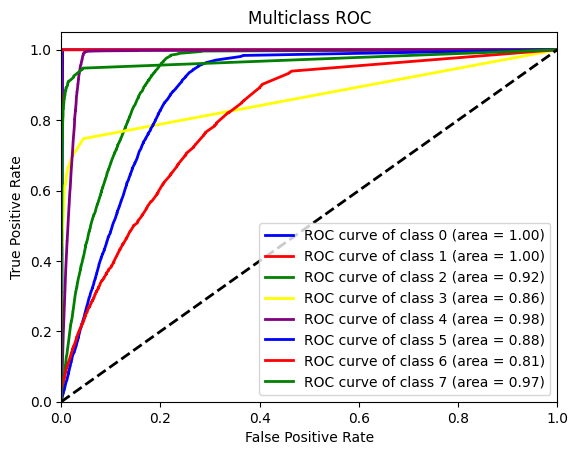

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np


if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_bin = label_binarize(y_test, classes=np.unique(y_test))
else:
    y_bin = y_test 

n_classes = y_bin.shape[1]

# Predicting probabilities for each class
y_pred_prob = model.predict_proba(X_test)

# Checking the shape of y_pred_prob
if y_pred_prob.shape[1] != n_classes:
    raise ValueError("The shape of y_pred_prob does not match the number of classes.")

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()


#### **F1 Score Metrics Results**

The highest F1 scores are approximately 0.999 for one class, indicating almost perfect performance, and other notably high scores for classes indicate strong performance as well (e.g., 0.898 and 0.758). The average F1 score, weighted by the number of true instances for each class, is approximately 0.775. This score takes into account the performance of the model across all classes, factoring in the class distribution.

Overall, these F1 scores suggest that while the model performs exceptionally well for certain classes, its performance for others is suboptimal. The relatively high average F1 score is encouraging, but the low scores for some classes should motivate further investigation into model improvements, such as hyperparameter tuning, better feature selection, or addressing any class imbalance.

In [43]:
from sklearn.metrics import f1_score

# Calculating F1-score for each class
f1_scores = f1_score(y_test, y_pred, average=None)
average_f1 = f1_score(y_test, y_pred, average='weighted')

print(f'F1 Scores per Class: {f1_scores}')
print(f'Average F1 Score: {average_f1}')


F1 Scores per Class: [0.         0.99941003 0.58273004 0.43137255 0.89793633 0.44129159
 0.26509988 0.75836431]
Average F1 Score: 0.7748726783660436


### **Discussion**

Throughout this project, I endeavored to construct a machine learning model that accurately predicts the severity of injuries sustained in traffic accidents. The initial phase of my work involved meticulous data preprocessing, ensuring that our dataset was devoid of missing values and that categorical variables were aptly encoded. The lack of missing data was a considerable advantage, allowing us to direct our efforts towards feature selection and model refinement.

I employed both SelectKBest and SelectFromModel for feature selection, identifying the most influential features for our models. This step was pivotal, as it not only streamlined our models but also likely prevented overfitting by reducing the dimensionality of our feature space.

Our modeling efforts included a comprehensive range of algorithms, namely RandomForest, Logistic Regression, and SVM. The hyperparameter tuning was meticulously conducted using GridSearchCV and RandomizedSearchCV, particularly for the RandomForest model, which yielded an impressive cross-validation accuracy. Adjustments made to the Logistic Regression model to address scaling and iteration count led to moderate success, while the SVM model, after accounting for selected features, demonstrated promising results.

The diagnostic performance of the models was examined through the lens of a confusion matrix and ROC curves. The confusion matrix for the RandomForest model illuminated its strengths and weaknesses across various classes, while the ROC curves underscored the model's discriminative power, with several classes achieving AUC scores indicative of excellent classification capability.

However, the journey was not without its hurdles. I encountered convergence issues during the optimization of the Logistic Regression model and noted that the predictive performance was not consistent across all classes, pointing to potential areas for improvement.

### **Conclusion**

This endeavor has showcased the application of machine learning in a real-world context, specifically for predicting injury severity in traffic incidents. The RandomForest Classifier stood out as the most effective model, with the SVM and Logistic Regression models also showing potential. While the accuracy varied across classes, the overall high scores suggest that these models could serve as valuable tools in practical settings.

For future work, I recommend to bolster the models' performance and reliability:

- Extended hyperparameter tuning and more exhaustive cross-validation to enhance the models, especially for the classes where performance was lacking.
- Exploration of different modeling techniques, including ensemble methods, which may improve predictive accuracy.
- A deeper dive into the features that most heavily influence predictions to gain insights that could inform feature engineering.
- Validation of the models against external datasets to ensure their robustness and applicability to different scenarios.

In closing, this project has affirmed the potential of machine learning in enhancing traffic safety initiatives and has provided a robust foundation for future research and application in this vital domain.